In [90]:
import prody as pr
import py3Dmol
import tempfile
import pandas as pd
from Analysis.PlotUtils import *
from scipy.ndimage import binary_dilation
import matplotlib.patches as mpatches
from IPython.display import display, HTML
from Bio import PDB
from Bio import pairwise2
from Bio.PDB import Superimposer
import py3Dmol
import ipywidgets as widgets
from Bio.PDB import PDBParser
from Bio import pairwise2
import py3Dmol
from Bio import PDB, Align
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Polypeptide import three_to_one
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
from config import *

In [91]:
fold_pair = str(input('Enter your fold swiching pair pdb ids separate with _ and with the chain at the end (ex: 3hdfA_3hdeA): \n'))


Enter your fold swiching pair pdb ids separate with _ and with the chain at the end (ex: 3hdfA_3hdeA): 
1nrjB_2gedB


In [92]:
plot_tool = PlotTool(folder='/Users/steveabecassis/Desktop/Pipeline', fold_pair=fold_pair)

@> 1780 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1429 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [93]:
VIZ_FOLDER    = f'{DATA_DIR}/{fold_pair}/output_cmap_esm/VizCmaps'

In [94]:
try:
    seq_fold1 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
    seq_fold2 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
except:
    try:
        seq_fold1 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
        seq_fold2 = seq_fold1
    except:
        seq_fold2 = extract_protein_sequence(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
        seq_fold1 = seq_fold2
        
# fold1_idxs,fold2_idxs = get_align_indexes(seq_fold1, seq_fold2)

# Visualizations and results

## Original Structure Visualization

In [95]:
pdb_file1 = read_pdb_file(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb')
plot_tool.plot_single_fold(pdb_file1,label=plot_tool.fold1)

pdb_file2 = read_pdb_file(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
plot_tool.plot_single_fold(pdb_file2,label=plot_tool.fold2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [96]:
try:
    plot_tool.plot_fold_alignement_(f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb',f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb')
except:
    print('plot fail !')

@> 1780 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1429 atoms and 1 coordinate set(s) were parsed in 0.02s.


2gedB_TEMP
Blue:1nrjB
Red:2gedB


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## AlphaFold predictions

### Best AF prediction to fold 1

In [97]:
df_af = pd.read_csv(f'{plot_tool.folder}/{fold_pair}/Analysis/df_af.csv')
df_af = df_af[df_af.cluster_num != 'Query'].iloc[:,1:-1]

In [98]:
try:
    max_af_pdb1 = df_af[df_af.score_pdb1 > df_af.score_pdb2].sort_values(by='score_pdb1',ascending=False).pdb_file.iloc[0]
    max_af_pdb1 = f'{plot_tool.folder}/{fold_pair}/AF_preds/{max_af_pdb1}'
    try:
        MAX_AF_1 = max_af_pdb1.split('/')[-1][11:14]
    except Exception as e:
        MAX_AF_1 = ''
        print(e)
    pdb_file1_ = f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold1}.pdb'
    score = df_af[df_af.score_pdb1 > df_af.score_pdb2].sort_values(by='score_pdb1',ascending=False).score_pdb1.iloc[0]
    plot_tool.align_and_visualize_pdb(max_af_pdb1,pdb_file1_,score)
except:
    try:
        plot_tool.plot_fold_alignement_(max_af_pdb1,pdb_file1_)
    except:
        MAX_AF_1 = ''
        print('No max_af_pdb1')

@> 1494 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1780 atoms and 1 coordinate set(s) were parsed in 0.03s.


Blue:ShallowMsa_007_unrelaxed_rank_003_alphafold2_ptm_model_1_seed_000
Red:1nrjB


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Best AF prediction to fold 2

In [101]:
MAX_AF_2 = ''
max_af_pdb2 = ''
try:
    max_af_pdb2 = df_af[df_af.score_pdb1 < df_af.score_pdb2].sort_values(by='score_pdb2',ascending=False).pdb_file.iloc[0]
    max_af_pdb2 = f'{plot_tool.folder}/{fold_pair}/AF_preds/{max_af_pdb2}'
    try:
        MAX_AF_2 = max_af_pdb2.split('/')[-1][11:14]
    except Exception as e:
        MAX_AF_2 = ''
        print(e)
    pdb_file2_ = f'{plot_tool.folder}/{plot_tool.fold_pair}/chain_pdb_files/{plot_tool.fold2}.pdb'
    score = df_af[df_af.score_pdb1 < df_af.score_pdb2].sort_values(by='score_pdb2',ascending=False).score_pdb2.iloc[0]
    plot_tool.align_and_visualize_pdb(max_af_pdb2,pdb_file2_,score)
except:
    try:
        plot_tool.plot_fold_alignement_(max_af_pdb2,pdb_file2_)
    except:
        MAX_AF_2 = ''
        print('No max_af_pdb2')

No max_af_pdb2


In [102]:
df_esmfold_analysis = pd.read_csv(f'{plot_tool.folder}_res/df_esmfold_analysis.csv')


## EsmFold Prediction


In [103]:
df_esmfold_analysis = pd.read_csv(f'{plot_tool.folder}_res/df_esmfold_analysis.csv')
df_esmfold = df_esmfold_analysis[df_esmfold_analysis.fold_pair == fold_pair]
df_esmfold = df_esmfold[df_esmfold.fold.str.contains('ShallowMsa')]
df_esmfold.head()

,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
2940,1nrjB_2gedB,ShallowMsa_000_1.pdb,0.84039,0.55750,000,0.803852,0.548968,10,1,0,1,0
2941,1nrjB_2gedB,ShallowMsa_000_0.pdb,0.83017,0.56039,000,0.803852,0.548968,10,1,0,1,0
2942,1nrjB_2gedB,ShallowMsa_000_2.pdb,0.80901,0.54242,000,0.803852,0.548968,10,1,0,1,0
2943,1nrjB_2gedB,ShallowMsa_000_3.pdb,0.79129,0.53502,000,0.803852,0.548968,10,1,0,1,0
2944,1nrjB_2gedB,ShallowMsa_000_7.pdb,0.78312,0.53837,000,0.803852,0.548968,10,1,0,1,0


In [104]:
df_esmfold[df_esmfold.cluster_num=='018']

,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
3120,1nrjB_2gedB,ShallowMsa_018_3.pdb,0.86280,0.57909,018,0.852165,0.585532,10,1,0,1,0
3121,1nrjB_2gedB,ShallowMsa_018_2.pdb,0.87745,0.58951,018,0.852165,0.585532,10,1,0,1,0
3122,1nrjB_2gedB,ShallowMsa_018_0.pdb,0.82636,0.58622,018,0.852165,0.585532,10,1,0,1,0
3123,1nrjB_2gedB,ShallowMsa_018_1.pdb,0.86236,0.59518,018,0.852165,0.585532,10,1,0,1,0
3124,1nrjB_2gedB,ShallowMsa_018_5.pdb,0.83431,0.59042,018,0.852165,0.585532,10,1,0,1,0
3125,1nrjB_2gedB,ShallowMsa_018_4.pdb,0.81059,0.57964,018,0.852165,0.585532,10,1,0,1,0
3126,1nrjB_2gedB,ShallowMsa_018_6.pdb,0.95151,0.60118,018,0.852165,0.585532,10,1,0,1,0
3127,1nrjB_2gedB,ShallowMsa_018_7.pdb,0.78536,0.58133,018,0.852165,0.585532,10,1,0,1,0
3128,1nrjB_2gedB,ShallowMsa_018_9.pdb,0.86253,0.57750,018,0.852165,0.585532,10,1,0,1,0
3129,1nrjB_2gedB,ShallowMsa_018_8.pdb,0.84838,0.57525,018,0.852165,0.585532,10,1,0,1,0


### Best EsmFold prediction to fold 1

In [105]:
# df_esmfold[df_esmfold.cluster_num =='022']

In [106]:
try:
    max_esm_pdb1 = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 > df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold1',ascending=False).fold.iloc[0]
    score = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 > df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold1',ascending=False).TMscore_fold1.iloc[0]
#     max_esm_pdb1_ = read_pdb_file(f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
#     plot_tool.plot_single_fold(max_esm_pdb1_,label='MAX ESM TM PDB1')
#     visualize_alignement_structure(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
    plot_tool.align_and_visualize_pdb(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}',score)
except Exception as e:
    print(e)
    try:
        plot_tool.plot_fold_alignement_(pdb_file1_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb1}')
    except Exception as e:
        print(e)
    

@> 1780 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1494 atoms and 1 coordinate set(s) were parsed in 0.02s.


Blue:1nrjB
Red:ShallowMsa_014_9


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Best EsmFold prediction to fold 2

In [107]:
try:
    max_esm_pdb2 = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 <df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold2',ascending=False).fold.iloc[0]
    score = df_esmfold[df_esmfold.TM_mean_cluster_pdb1 < df_esmfold.TM_mean_cluster_pdb2].sort_values(by='TMscore_fold2',ascending=False).TMscore_fold2.iloc[0]
    plot_tool.align_and_visualize_pdb(pdb_file2_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb2}',score)
    print(score)
except Exception as e:
    print(e)
    try:
        print(score)
        plot_tool.plot_fold_alignement_(pdb_file2_,f'{plot_tool.folder}/{fold_pair}/output_esm_fold/{max_esm_pdb2}')
    except Exception as e:
        print(e)
    

@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


single positional indexer is out-of-bounds
0.95151
/Users/steveabecassis/Desktop/Pipeline/1nrjB_2gedB/output_esm_fold/ShallowMsa_064_2.pdb is not a valid filename or a valid PDB identifier.


In [108]:
df_esmfold





,fold_pair,fold,TMscore_fold1,TMscore_fold2,cluster_num,TM_mean_cluster_pdb1,TM_mean_cluster_pdb2,sample_count,is_fold_1,is_fold_2,cluster_fold_1,cluster_fold_2
2940,1nrjB_2gedB,ShallowMsa_000_1.pdb,0.84039,0.55750,000,0.803852,0.548968,10,1,0,1,0
2941,1nrjB_2gedB,ShallowMsa_000_0.pdb,0.83017,0.56039,000,0.803852,0.548968,10,1,0,1,0
2942,1nrjB_2gedB,ShallowMsa_000_2.pdb,0.80901,0.54242,000,0.803852,0.548968,10,1,0,1,0
2943,1nrjB_2gedB,ShallowMsa_000_3.pdb,0.79129,0.53502,000,0.803852,0.548968,10,1,0,1,0
2944,1nrjB_2gedB,ShallowMsa_000_7.pdb,0.78312,0.53837,000,0.803852,0.548968,10,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3185,1nrjB_2gedB,ShallowMsa_024_7.pdb,0.84037,0.56417,024,0.847764,0.561948,10,1,0,1,0
3186,1nrjB_2gedB,ShallowMsa_024_5.pdb,0.84561,0.56097,024,0.847764,0.561948,10,1,0,1,0
3187,1nrjB_2gedB,ShallowMsa_024_4.pdb,0.85427,0.56050,024,0.847764,0.561948,10,1,0,1,0
3188,1nrjB_2gedB,ShallowMsa_024_9.pdb,0.84072,0.55567,024,0.847764,0.561948,10,1,0,1,0


## Contact maps Msa Transformers

In [109]:
import pyarrow
df_cmap = pd.read_csv(CMAP_RES_PATH)
df_cmap = df_cmap[df_cmap.fold_pair == fold_pair]
try:
    MAX_RECALL_1 = df_cmap[df_cmap.recall_only_fold1 > df_cmap.recall_only_fold2].sort_values(by='recall_only_fold1',ascending=False).iloc[0]
    MAX_CLUSTER_RECALL_1 = MAX_RECALL_1.File[-7:-4]
except:
    MAX_CLUSTER_RECALL_1 = ''
try:
    MAX_RECALL_2 = df_cmap[df_cmap.recall_only_fold1 < df_cmap.recall_only_fold2].sort_values(by='recall_only_fold2',ascending=False).iloc[0]
    MAX_CLUSTER_RECALL_2 = MAX_RECALL_2.File[-7:-4]
except:
    MAX_CLUSTER_RECALL_2 = ''
    

In [110]:
# df_cmap = pd.read_parquet('/Users/steveabecassis/Desktop/Pipeline/cmap_exact_analysis_tol0.parq')
# df_cmap.FoldPair.unique()

In [111]:
viz_folder = VIZ_FOLDER
if MAX_CLUSTER_RECALL_1 != '':
    file_max_recall_1 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_CLUSTER_RECALL_1}_visualization_map_1_tol_0.npy'
else:
    file_max_recall_1 = ''

if MAX_CLUSTER_RECALL_2 != '':
    file_max_recall_2 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_CLUSTER_RECALL_2}_visualization_map_2_tol_0.npy'
else:
    file_max_recall_2 = ''

In [112]:
def plot_viz_cmap(file,legend_plot):
    # Create a sample 2D numpy array (replace this with your actual data)
    visualization_map = np.load(file)
    size = 50
    data = np.random.choice([0, 1, 1.25, 1.5, 1.75], size=(size, size))

    # Create a custom colormap
    colors = ['grey', 'lightblue', 'purple', 'blue', 'magenta']
    values = [0, 1, 1.25, 1.5, 1.75]
    bounds = [0, 0.99, 1.24, 1.49, 1.74, 2]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # Create the plot
    plt.figure(figsize=(10, 8))
    im = plt.imshow(visualization_map, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

    # Create legend elements
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
        Patch(facecolor='purple', edgecolor='black', label='Unique State Experiment contact'),
        Patch(facecolor='blue', edgecolor='black', label='Experiment contact predicted'),
        Patch(facecolor='magenta', edgecolor='black', label='Unique State Experiment contact predicted')
    ]

    # Add the legend
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set title and labels
    plt.title(legend_plot)
    plt.xlabel('Residue Index')
    plt.ylabel('Residue Index')

    # Adjust layout to make room for the legend
    plt.tight_layout()

    # Show the plot
    plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

def plot_viz_cmap_(file1, file2, legend_plot):
    # Load the two 2D numpy arrays
    visualization_map1 = np.load(file1)
    visualization_map2 = np.load(file2)
    
    # Ensure both arrays have the same shape
    assert visualization_map1.shape == visualization_map2.shape, "Both input arrays must have the same shape"
    
    # Create a combined array
    combined_map = np.tril(visualization_map1) + np.triu(visualization_map2, k=1)
    
    # Create a custom colormap
    colors = ['grey','blue','lightblue','purple','blue','magenta']
    bounds = [0, 0.49, 0.99, 1.24, 1.49, 1.74, 2]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # Create the plot
    plt.figure(figsize=(10,8))
    im = plt.imshow(combined_map, cmap=cmap, norm=norm, interpolation='nearest', origin='lower')

    # Create legend elements
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
        Patch(facecolor='purple', edgecolor='black'   , label='Unique State Experiment contact'),
        Patch(facecolor='blue', edgecolor='black'     , label='Predicted contacts'),
        Patch(facecolor='magenta', edgecolor='black'  , label='Unique State Experiment contact predicted')
    ]

    # Add the legend
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set title and labels
    plt.title(legend_plot)
    plt.xlabel('Residue Index')
    plt.ylabel('Residue Index')

    # Adjust layout to make room for the legend
    plt.tight_layout()

    # Show the plot
    plt.show()

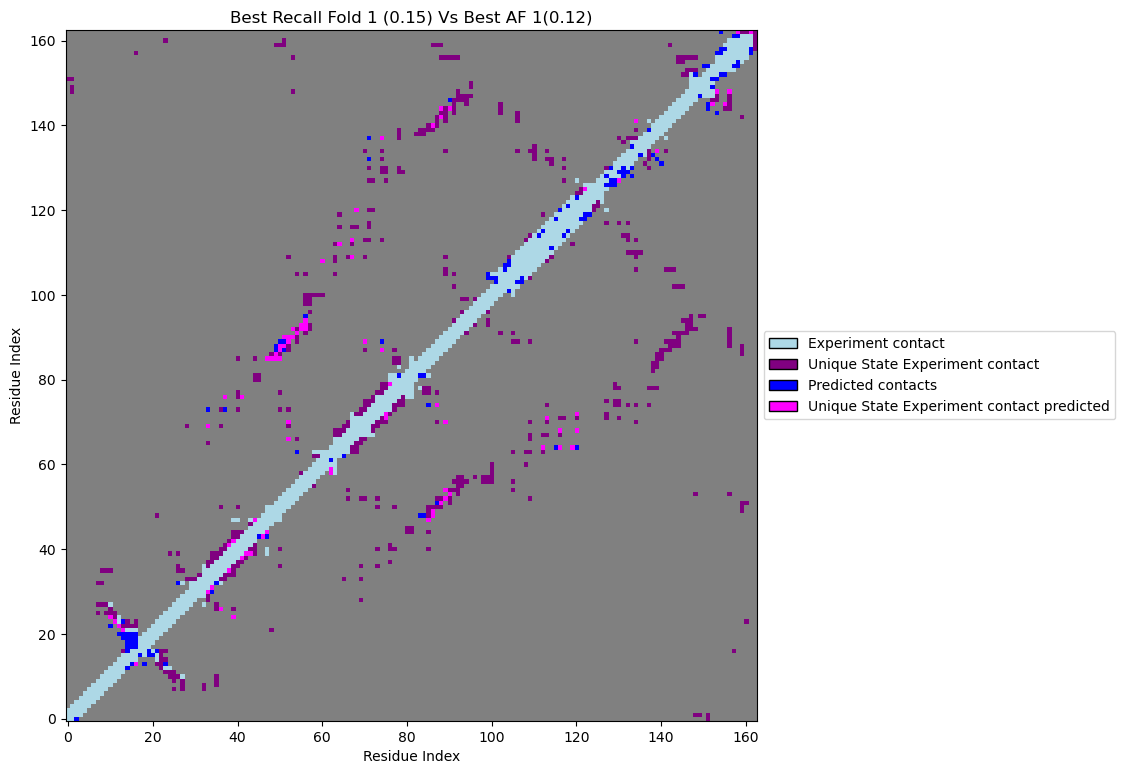

In [114]:
if (file_max_recall_1) and (MAX_AF_1) : 
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_1)].recall_only_fold1.iloc[0]
    plot_viz_cmap_(f'{file_max_recall_1}',f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_1.recall_only_fold1}) Vs Best AF 1({af_cmap_recall})')
elif (file_max_recall_1):
    plot_viz_cmap(f'{file_max_recall_1}',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_1.recall_only_fold1})')
elif (MAX_AF_1):
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_1)].recall_only_fold1.iloc[0]
    plot_viz_cmap(f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy',legend_plot=f'Best AF 1({af_cmap_recall})')
    
    

In [119]:

if (file_max_recall_2) and (MAX_AF_2) : 
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_2)].recall_only_fold2.iloc[0]
    plot_viz_cmap_(f'{file_max_recall_2}',f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy',legend_plot=f'Best Recall Fold 1 ({MAX_RECALL_2.recall_only_fold2}) Vs Best AF 2({af_cmap_recall})')
elif (file_max_recall_2):
    plot_viz_cmap(f'{file_max_recall_2}',legend_plot=f'Best Recall Fold 2 ({MAX_RECALL_2.recall_only_fold2})')
elif (MAX_AF_2):
    af_cmap_recall = df_cmap[df_cmap.File.str.contains(MAX_AF_2)].recall_only_fold2.iloc[0]
    plot_viz_cmap(f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy',legend_plot=f'Best AF 2 ({af_cmap_recall})')
    
    

In [ ]:
def plot_array_contacts_and_predictions(predictions, contacts, save_file=[]):
    """
    Plot multiple contacts and predictions together

    Parameters:
    predictions: Contact map predictions
    contacts: True Contact MAps (pair)
    save_file (str): Path to save the output image.
    """
    n_pred = len(predictions)
    n_row = math.ceil(math.sqrt(n_pred))  # *2
    if n_row * (n_row - 1) >= n_pred:  # *2
        n_col = n_row - 1
    else:
        n_col = n_row

    n_AA_aligned = len(contacts[next(iter(contacts))])  # number of aligned amino-acids in contacts
    fig, axes = plt.subplots(figsize=(18, 18), nrows=n_row, ncols=n_col, layout="compressed")
    #    print("Num cmaps: " + str(n_pred))
    #    print(axes.shape)
    #    fig, axes = plt.subplots(figsize=(18, 6), ncols=n_pred)
    ctr = 0
    #    for ax, name in zip(axes, PDB_IDS):
#    print("Contact lens:" + str(len(contacts)))
    recall = {}
    for name in predictions.keys():  # loop over predictions
        if n_col == 1:
            ax = axes[ctr]
        else:
            ax = axes[ctr // n_col, ctr % n_col]
        ctr = ctr + 1
#        print("Plotting prediction: " + name)  # + " -> true: " + true_name)
        recall[name] = plot_foldswitch_contacts_and_predictions(
            predictions[name], contacts, ax=ax, title=name, show_legend= ctr == 1)


    if len(save_file) > 0:  # save and close plot (enable automatic saving of multiple plots)
        plt.savefig(save_file + '.png')
        print("Save cmap fig: " + save_file + '.png')
    else:
        plt.show()

    # Find maximum and display plot for the best clusters:
#    print("Recall all clusters:", recall)
#    print("Recall no deep: ", {x:recall[x] for x in recall.keys() if "deep" not in x})
    best_recall_clusters = find_max_keys({x:recall[x] for x in recall.keys() if "deep" not in x})  # Need to exclude the deep alignment here !!!
    print("Best recall clusters: ", best_recall_clusters)
    best_cluster_ids = {x : int(best_recall_clusters[x][0][-3:]) for x in best_recall_clusters}
    print("Best recall clusters with IDS: ", best_recall_clusters, best_cluster_ids)
    fold_ids = list(contacts.keys())
    # Create a new figure for the second plot
    plt.figure(figsize=(10, 8))  # Adjust size as needed

    # Load energies:
    energy_dir = "Pipeline/output_deltaG"
    print("Load: ", os.path.join(energy_dir, f"deltaG_{fold_ids[0][:4]}.txt"))
    residue_energies_0 = read_energy_tuples(os.path.join(energy_dir, f"deltaG_{fold_ids[0][:4]}.txt"))
    residue_energies_1 = read_energy_tuples(os.path.join(energy_dir, f"deltaG_{fold_ids[1][:4]}.txt"))

    delta_energies, delta_energies_filtered = align_and_compare_residues(residue_energies_0, residue_energies_1, fold_ids[0][:4], fold_ids[1][:4])
#    print("delta_energies", delta_energies, " len=", len(delta_energies))
#    print("delta_energies_filtered", delta_energies_filtered, " len=", len(delta_energies_filtered))
    print("n_AA_aligned=", n_AA_aligned)

    delta_energies_filtered = np.array(delta_energies_filtered[:n_AA_aligned])  # Temp: need to fix alignment here!!!

    best_recall = plot_foldswitch_contacts_and_predictions( predictions=(predictions[best_recall_clusters[fold_ids[0]][0]],
                                                            predictions[best_recall_clusters[fold_ids[1]][0]]),
                                                            contacts=contacts, title="Best clusters", show_legend=True,
                                                            cluster_names= (str(best_cluster_ids[fold_ids[0]]), str(best_cluster_ids[fold_ids[1]])),
                                                            x_vector = delta_energies_filtered,
                                                            y_vector = delta_energies_filtered)
    print("best recall: ", best_recall)
    plt.savefig(save_file.replace('all', 'best'))
    plt.close()  # Close the figure to avoid reuse issues


In [ ]:
plot_array_contacts_and_predictions(predictions, contacts)

In [116]:
# if MAX_AF_2 or file_max_recall_2:
#     file1 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_1}_visualization_map_1_tol_0.npy'
#     file2 = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy'


#     legend_plot=f'Contact map cluster 47 (fold 1) Vs Contact map cluster 18 (fold 2)'

#     # Load the two 2D numpy arrays
#     visualization_map1 = np.load(file1)
#     visualization_map2 = np.load(file2)
#     # Ensure both arrays have the same shape
#     assert visualization_map1.shape == visualization_map2.shape, "Both input arrays must have the same shape"

#     # Create a combined array
#     combined_map = np.tril(visualization_map1) + np.triu(visualization_map2, k=1)

#     # Create a custom colormap
#     colors = ['grey','blue','lightblue','purple','blue','magenta']
#     bounds = [0, 0.49, 0.99, 1.24, 1.49, 1.74, 2]
#     cmap = ListedColormap(colors)
#     norm = BoundaryNorm(bounds, cmap.N)

#     # Create the plot
#     plt.figure(figsize=(10,8))
#     im = plt.imshow(combined_map, cmap=cmap, norm=norm, interpolation='nearest', origin='lower')

#     # Create legend elements
#     legend_elements = [
#         Patch(facecolor='lightblue', edgecolor='black', label='Overlap contact'),
#         Patch(facecolor='purple', edgecolor='black'   , label='Unique State Experiment contact'),
#         Patch(facecolor='blue', edgecolor='black'     , label='Predicted contacts'),
#         Patch(facecolor='magenta', edgecolor='black'  , label='Unique State Experiment contact predicted')
#     ]

#     # Add the legend
#     plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

#     # Set title and labels
#     plt.title(legend_plot)
#     plt.xlabel('Residue Index')
#     plt.ylabel('Residue Index')

#     # Adjust layout to make room for the legend
#     plt.tight_layout()

#     # Show the plot
#     plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/steveabecassis/Desktop/Pipeline/1nrjB_2gedB/output_cmap_esm/VizCmaps/msa_t__ShallowMsa__visualization_map_2_tol_0.npy'

In [ ]:
# def get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1):
#     pdb_obj = md.load_pdb(pdb_file)
#     distances, pairs = md.compute_contacts(pdb_obj)
#     contacts = md.geometry.squareform(distances, pairs)[0]
#     if size is None:
#         size = contacts.shape[0]
#     arr = np.zeros([size, size])
#     arr[np.where(contacts[start_pos:end_pos, start_pos:end_pos] < 0.5)] = 1
#     return arr
# def plot_cmap(frame_contacts):
#     fig, ax = frame_contacts.residue_contacts.plot()
#     plt.xlabel("Residue")
#     xlim = frame_contacts.query_residue_range[-1]
#     plt.xlim([0, xlim])
#     plt.ylim([0, xlim])
#     _ = plt.ylabel("Residue")

In [36]:
# pdb_file = '/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/chain_pdb_files/4dxrA.pdb'
# a = get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1)
# plt.imshow(a, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

In [37]:
# pdb_file = '/Users/steveabecassis/Desktop/Pipeline/4dxrA_4dxtA/chain_pdb_files/4dxtA.pdb'
# a = get_contact_map_from_pdb(pdb_file, size=None, start_pos=0, end_pos=-1)
# plt.imshow(a, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

In [34]:
# !cat PlotUtils.py

cat: PlotUtils.py: No such file or directory


In [38]:
# file = f'{viz_folder}/msa_t__ShallowMsa_{MAX_AF_2}_visualization_map_2_tol_0.npy'
# legend_plot = ''
# # Create a sample 2D numpy array (replace this with your actual data)
# visualization_map = np.load(file)[-82:, -82:]
# size = 50
# data = np.random.choice([0, 1, 1.25, 1.5, 1.75], size=(size, size))

# # Create a custom colormap
# colors = ['grey', 'lightblue', 'purple', 'blue', 'magenta']
# values = [0, 1, 1.25, 1.5, 1.75]
# bounds = [0, 0.99, 1.24, 1.49, 1.74, 2]
# cmap = ListedColormap(colors)
# norm = BoundaryNorm(bounds, cmap.N)

# # Create the plot
# plt.figure(figsize=(10, 8))
# im = plt.imshow(visualization_map, cmap=cmap, norm=norm, interpolation='nearest',origin='lower')

# # Create legend elements
# legend_elements = [
#     Patch(facecolor='lightblue', edgecolor='black', label='Experiment contact'),
#     Patch(facecolor='purple', edgecolor='black', label='Unique State Experiment contact'),
#     Patch(facecolor='blue', edgecolor='black', label='Experiment contact predicted'),
#     Patch(facecolor='magenta', edgecolor='black', label='Unique State Experiment contact predicted')
# ]

# # Add the legend
# plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# # Set title and labels
# plt.title(legend_plot)
# plt.xlabel('Residue Index')
# plt.ylabel('Residue Index')

# # Adjust layout to make room for the legend
# plt.tight_layout()

# # Show the plot
# plt.show()